In [45]:
#Dependencies

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation #support vector machince
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt

style.use('ggplot')

In [12]:
#quandl config
quandl.ApiConfig.api_key = 'kjAm74Dpyze2hSgzXv67'

In [13]:
#Get Google Stock Data
google_df = quandl.get('WIKI/GOOGL')
google_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [14]:
google_df = google_df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]

In [15]:
#High and Low Percent difference
google_df['HL_PRCNT'] = (google_df['Adj. High'] - google_df['Adj. Close'])/ google_df['Adj. Close'] * 100

#Percent Change from close and open 
google_df['PCT_change'] = (google_df['Adj. Close'] - google_df['Adj. Open'])/ google_df['Adj. Open'] * 100

google_df= google_df[['Adj. Close','HL_PRCNT','PCT_change', 'Adj. Volume']]

In [16]:
google_df

,Adj. Close,HL_PRCNT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [17]:
#this would be a forecasted column
forecast_col = 'Adj. Close'

#N/a data
google_df.fillna(-99999, inplace=True) #in ML you cant use NaN so it would be set as outliers

forecast_out = int(math.ceil(0.01*len(google_df)))  #math.ciel will round up to whole number. This code is number of days out by 10%

google_df['label'] = google_df[forecast_col].shift(-forecast_out) # label is time in the future for the data
google_df.dropna(inplace=True)
google_df.head()

,Adj. Close,HL_PRCNT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


### Features and Labels

In [35]:
#Features = X, Labels= y
X = np.array(google_df.drop(['label'],1)) #This is everything except the label column 
X = preprocessing.scale(X) # you want the value to be used with the training with old and new 
#X = X[:-forecast_out]
X_lately=X[-forecast_out:]
x=X[:-forecast_out]

google_df.dropna(inplace=True)
y = np.array(google_df['label'])
y = np.array(google_df['label'])

print(len(X),len(y))

3389 3389


In [36]:
#Creating train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) #testing 20% of the data

In [37]:
#classifier
#clf = svm.SVR()   #Support Vector Regression
clf = LinearRegression(n_jobs=10)
clf.fit(X_train,y_train)

accuracy = clf.score(X_train,y_train)
print(accuracy)

0.9775963137252701


In [42]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

google_df['Forecast']= np.nan #sets all values in this column to Nan

[1078.86154271 1093.55353653 1107.60192116 1102.24677963 1095.73923406
 1093.10135103 1091.55571637 1088.52605254 1082.27920283 1077.88997045
 1075.61281043 1094.99061537 1113.41667587 1118.00040574 1132.95287755
 1136.97739598 1135.67398646 1133.16756836 1134.97862011 1153.26531939
 1152.35598033 1162.64734475 1159.18677766 1166.98391189 1187.15558782
 1199.6733982  1193.86488211 1205.94652487 1211.56583522 1209.45137927
 1200.19547873 1205.89485501 1204.43172597 1139.8621823  1086.22828375] 0.9775963137252701 35


In [43]:
#time converting to get dates for these forecasted values
last_date = google_df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day  #when you do predictions the predicitoins dont have a nessecary date so we would have to generate that


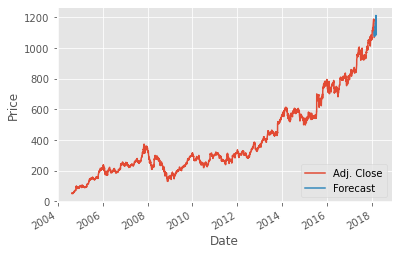

In [46]:
for i in forecast_set:
    next_date = dt.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    google_df.loc[next_date] = [np.nan for _ in range(len(google_df.columns)-1) ] + [i]

google_df['Adj. Close'].plot()
google_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()